<a href="https://colab.research.google.com/github/Jit562/covid-19-sentiment-analysis/blob/main/covid_19_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Name -**Covid-19 Sentiment Analysis : Coronavirus Tweet Sentiment Analysis.



**Project Type** - Classification/Supervised Learning

**Contribution** - Individual

**Team Member** - 1

**BY-Jitendra Prasad** (jitendra.mits2@gmail.com)

## **Project Summary** :-  Sentiment Analysis in Coronavirus Tweet Sentiment Analysis

Sentiment analysis aims to determine a writer’s attitude towards a topic or the overall contextual polarity of a document. The attitude can be his judgment or assessment, his emotional state or the intended emotional communication.

In sentiment analysis, the main task is to identify opinion words, which is very important. Opinion words are dominant indicators of feelings, especially adjectives, adverbs, and verbs, for example: “I love this camera. It’s amazing!”

Opinion words are also known as polarity words, sentiment words, opinion lexicon, or opinion words, which can generally be divided into two types: positive words, for example, wonderful. , elegant, astonishing; and negative words, eg horrible, disgusting, poor.

## **GitHub Link -**

## **Problem Statement-**
After reading the dataset which contains 41k Covid 19 reviews from Coronavirus Tweet Analysis, we see that there are three prominent columns. One being TEXT which contains the criticism and the other being LABEL which contains the O’s a 1’s and 2's, where 0-NEGATIVE , 1-POSITIVE and 2-Neutral.

##**Key Features of the Covid-19 Dataset:-**

**Column Details**

* **Username:** Tweet on covid sentiment user

* **ScreenName:** Tweet on covid sentiment Screen

* **Location:** Country name and city

* **TweetAt:** Date and time Tweet

* **OriginalTweet:** The user thought tweet about the covid

* **Sentiment:** Positive, Negetive, Neutral ( Which type of tweet through user )

## **General Guidelines : -**

1. Well-structured, formatted, and commented code is required.

2. Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

The additional credits will have advantages over other students during Star Student selection.

    [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
              without a single error logged. ]
3. Each and every logic should have proper comments.

4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.

# Chart visualization code
        
*  Why did you pick the specific chart?
*  What is/are the insight(s) found from the chart?
*  Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
5. You have to create at least 15 logical & meaningful charts having important insights.

[ Hints : - Do the Vizualization in a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis ]

6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.
* Explain the ML Model used and it's performance using Evaluation metric Score Chart.

* Cross- Validation & Hyperparameter Tuning

* Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

## **Let's Begin !**

**1. Know Your Data**

**Import Libraries**

Data Preprocessing, cleaning and EDA

In [172]:
# data Clean and Visualization Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')


# data Preprocesing library
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [173]:
# Data Vectorizer or feauture extraction Library
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Data Similarity Library
from sklearn.metrics.pairwise import cosine_similarity

# data Extract Library
from sklearn.model_selection import train_test_split

#Check Accurracy model library
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# data Scaling library
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder, PolynomialFeatures

#data missing value haldle library
from sklearn.impute import SimpleImputer

# machine Learning Classifiction Model Library
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Model validation Library
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

#Pipeline Library
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


## **Load dataset**

In [174]:
# Data Load
df = pd.read_csv('/content/drive/MyDrive/Dataset/Classification_data/Copy of Coronavirus Tweets.csv',  encoding='latin-1')

## Dataset First View

In [175]:
# Check the top 5 data
df.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [176]:
# Check the below 5 data
df.tail(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


In [177]:
# Check the random data
df.sample(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
20761,24560,69512,chennai,25-03-2020,Respectable Prime Minister We appreciate all y...,Positive
12974,16773,61725,"Vancouver, British Columbia",21-03-2020,@ring Hello! The company I work for is looking...,Neutral
14614,18413,63365,??,21-03-2020,?? The current situation of Kyoto.\r\r\n#kyoto...,Extremely Negative
41016,44815,89767,"Perth, Western Australia",14-04-2020,COVID-19 has thrown a spanner in the works for...,Positive
16666,20465,65417,NaN,22-03-2020,@markmondoka We have mastered being a mickey m...,Negative


## Dataset Rows & Columns count

In [178]:
# Check data columns and row
df.shape

(41157, 6)

In [179]:
# Total number of rows
total_rows = df.shape[0]

# Total Columns

total_columns = df.shape[1]

print(f"Total number of rows: {total_rows}")
print(f"Total number of columns: {total_columns}")

Total number of rows: 41157
Total number of columns: 6


41157 Rowa available in the dataset

6 columns are available in the dataset

### Dataset Information

In [180]:
# check the data Inforamtion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


**null values in the dataset**
1. Username and ScreenName are Int64 data type
2. Location, TweetAt, Original_Tweet and Sentiment are objects data type


### Duplicate Values

In [181]:
df.duplicated().sum()

0

No Duplicate value available in the dataset

In [182]:
# check the data Inforamtion for numerical data
df.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


### Missing Values/Null Values

In [183]:
# Check the data Null values
df.isnull().sum()

,0
UserName,0
ScreenName,0
Location,8590
TweetAt,0
OriginalTweet,0
Sentiment,0


In [184]:
# Total number of rows
total_rows = df.shape[0]

# Number of null values in 'Location' column
null_count = df['Location'].isnull().sum()

# Percentage of null values
null_percentage = (null_count / total_rows) * 100

# Display the result
print(f"Percentage of null values in 'Location': {null_percentage:.2f}%")

# Display the Number of null data
print(f"Number of null values in 'Location': {null_count}")

Percentage of null values in 'Location': 20.87%
Number of null values in 'Location': 8590


Only Location Columns in ( 20% ) missing value

Percentage of null values in 'Location': 20.87%

Number of null values in 'Location': 8590


### Visualizing the missing values

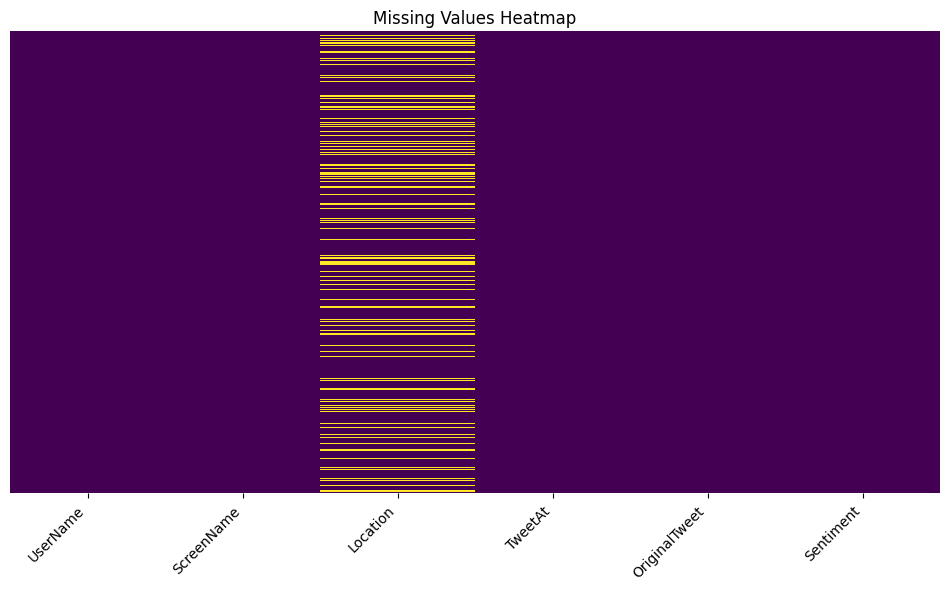

In [185]:
#Set the figger size
plt.figure(figsize=(12, 6))

# Create a heatmap to visualize missing values
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set the title
plt.title('Missing Values Heatmap')
plt.show()

### **What did you know about your dataset?**

1. 41157 Rowa available in the dataset
2. 6 columns are available in the dataset
3. null values in the dataset
4. Username and ScreenName are Objects data type
5. Loaction, TweetAt, OriginalTweet and Sentiment are Int64 data type
6. No Duplicate data in the dataset
7. Location Columns in the Missing values or null values in the dataset
8. Percentage of null values in 'Location': 20.87%

9. Number of null values in 'Location': 8590
10. TweetAt data is Datetime data
11. UserName and ScreenName is wrong data

## **Understanding Your Variables**

In [186]:
# check the data columns
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

### **Column Details**

*  **Username:** Tweet on covid sentiment user

*  **ScreenName:** Tweet on covid sentiment Screen

*  **Location:** Country name and city

*  **TweetAt:** Date and time Tweet

*  **OriginalTweet:** The user thought tweet about the covid

*  **Sentiment:** Positive, Negetive, Neutral  ( Which type of tweet through user )

### **Check the all columns Unique data**

In [187]:
for col in df.columns:
  uq_values = df[col].nunique()
  print(f"Unique values in column {col} : {uq_values}")

Unique values in column UserName : 41157
Unique values in column ScreenName : 41157
Unique values in column Location : 12220
Unique values in column TweetAt : 30
Unique values in column OriginalTweet : 41157
Unique values in column Sentiment : 5


* Unique values in column UserName : 41157
* Unique values in column ScreenName : 41157
* Unique values in column Location : 12220
* Unique values in column TweetAt : 30
* Unique values in column OriginalTweet : 41157
* Unique values in column Sentiment : 3

In [188]:
# check the data world type
df.iloc[0:1, 4:5]

,OriginalTweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...


### convert the data Extremely Positive and Extremely Negetive to positive and negetive data

In [189]:
# Create the method to convert Extremely Positive and Extremely Negetive to positive and negetive data
def Sentiment_value(x):
  if x == 'Extremely Positive':
    return "positive"
  elif x == "Positive":
    return "positive"
  elif x == "Extremely Negative":
    return "negative"
  elif x == "Negative":
    return "negative"
  else:
    return "neutral"

In [190]:
# Apply the method to convert positavi and negetive
df['Sentiment'] = df['Sentiment'].apply(Sentiment_value)

In [191]:
# Check the data value counts
df['Sentiment'].value_counts()

,count
Sentiment,
positive,18046
negative,15398
neutral,7713


### Create new data using old dataset

In [192]:
# Create the Anothe data using old data
new_df = df.copy()

### Check the data columns and rows

In [193]:
# Total number of rows
total_rows = new_df.shape[0]

# Total Columns

total_columns = new_df.shape[1]

print(f"Total number of rows: {total_rows}")
print(f"Total number of columns: {total_columns}")

Total number of rows: 41157
Total number of columns: 6


In [194]:
# Check the data columns
new_df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

### **Clean the data on Original Tweet**

In [195]:
# Data Clean example = sweet to sweets , or go --> goes same world convert only one world using this method
port_stem = PorterStemmer()

In [196]:
# Data Cleaning using Regular expression
def clean_text(text):
  text = re.sub(r'@\w+|https?://\S+|[^A-Za-z0-9\s]', '', text)
  text = re.sub(r'[\r\n]+', ' ', text)
  text = re.sub(r'[^a-zA-Z]', ' ', text)

  text = text.lower()
  text = text.split()
  text = [port_stem.stem(word) for word in text if not word in stopwords.words('english')]

  text = ' '.join(text)

  return text


In [197]:
# Clean function apply in the Originaltweet data
new_df['OriginalTweet'] = new_df['OriginalTweet'].apply(clean_text)

In [198]:
# Clean data after check using sample method
new_df['OriginalTweet'].sample(10)

,OriginalTweet
6426,protect afford price coronaviru coronavirusuk ...
2932,europ chemic price stock sink stimulu afterglo...
11968,let clapat tonight thank everyon support covid...
7744,live stream sit car groceri store watch patter...
22714,amazon ebay fail stop covid profit say consum ...
25458,lol stat barrel oil worth less one deliveri pi...
4445,copper price crash tonn first time three year ...
25943,solv socialdistanc puzzl leav supermarket keep...
10091,danish friend see mani peopl street shop open ...
10202,supermarket sweep turn real life peopl serious...


In [199]:
# check the only neutral randomaly data
new_df[new_df['Sentiment']=="neutral"].sample(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
25847,29646,74598,New York,01-04-2020,german veget price may rise coronaviru disrupt...,neutral
28126,31925,76877,NaN,04-04-2020,cell phone data tell whole stori virginia driv...,neutral
32307,36106,81058,India,07-04-2020,fuelupd petrol diesel price stagnant nd day to...,neutral
21342,25141,70093,"Arizona, USA",25-03-2020,covid consum behaviour b b reinvest digit digi...,neutral
14085,17884,62836,Jammu &Kashmir UnionTerritory,21-03-2020,indian govern announc gazett india order fix r...,neutral
23498,27297,72249,Roma,26-03-2020,latest news revis european parliament calendar...,neutral
18882,22681,67633,Earth?,24-03-2020,didnt anybodi tell toiletpap go new currenc ap...,neutral
15352,19151,64103,"Wall, NJ",22-03-2020,rememb pictur take need pandem covid stophoard...,neutral
186,3985,48937,United States,16-03-2020,,neutral
19942,23741,68693,Earth,24-03-2020,toilet paper commerci taunt peopl coronaviru h...,neutral


In [200]:
#Check the Data Information
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [201]:
# check the null values of holl dataset
new_df.isnull().sum()

,0
UserName,0
ScreenName,0
Location,8590
TweetAt,0
OriginalTweet,0
Sentiment,0


In [202]:
# Total number of rows
total_rows = new_df.shape[0]

# Number of null values in 'Location' column
null_count = new_df['Location'].isnull().sum()

# Percentage of null values
null_percentage = (null_count / total_rows) * 100

# Display the result
print(f"Percentage of null values in 'Location': {null_percentage:.2f}%")

# Display the Number of null data
print(f"Number of null values in 'Location': {null_count}")


Percentage of null values in 'Location': 20.87%
Number of null values in 'Location': 8590


### **find Unique Values for each variable.**

In [203]:
for col in new_df.columns:
  uq_values = new_df[col].nunique()
  print(f"Unique values in column {col} : {uq_values}")

Unique values in column UserName : 41157
Unique values in column ScreenName : 41157
Unique values in column Location : 12220
Unique values in column TweetAt : 30
Unique values in column OriginalTweet : 40850
Unique values in column Sentiment : 3


* Unique values in column UserName : 41157
* Unique values in column ScreenName : 41157
* Unique values in column Location : 12220
* Unique values in column TweetAt : 30
* Unique values in column OriginalTweet : 40850
* Unique values in column Sentiment : 3

## **Data Wrangling**

#### Data Wrangling Code

In [204]:
## Convert TweetAt objects data to date and time formate

new_df['TweetAt'] = pd.to_datetime(new_df['TweetAt'])

In [205]:
# Check data type after change
new_df['TweetAt'].dtypes

dtype('<M8[ns]')

#### Extract the year, month, week, quarter

In [206]:
new_df['year'] = new_df['TweetAt'].dt.year # extract the year
new_df['month'] = new_df['TweetAt'].dt.month_name() # extract the month name
new_df['week'] = new_df['TweetAt'].dt.weekday # extract the week
new_df['quarter'] = new_df['TweetAt'].dt.quarter # extract the quarter

In [207]:
## Extract the week name
new_df['week_name'] = new_df['TweetAt'].dt.day_name()

In [208]:
# after Extract the year, month, week
new_df.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,year,month,week,quarter,week_name
0,3799,48751,London,2020-03-16,,neutral,2020,March,0,1,Monday
1,3800,48752,UK,2020-03-16,advic talk neighbour famili exchang phone numb...,positive,2020,March,0,1,Monday
2,3801,48753,Vagabonds,2020-03-16,coronaviru australia woolworth give elderli di...,positive,2020,March,0,1,Monday
3,3802,48754,NaN,2020-03-16,food stock one empti pleas dont panic enough f...,positive,2020,March,0,1,Monday
4,3803,48755,NaN,2020-03-16,readi go supermarket covid outbreak im paranoi...,negative,2020,March,0,1,Monday


In [209]:
new_df[new_df['OriginalTweet'] != '']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,year,month,week,quarter,week_name
1,3800,48752,UK,2020-03-16,advic talk neighbour famili exchang phone numb...,positive,2020,March,0,1,Monday
2,3801,48753,Vagabonds,2020-03-16,coronaviru australia woolworth give elderli di...,positive,2020,March,0,1,Monday
3,3802,48754,NaN,2020-03-16,food stock one empti pleas dont panic enough f...,positive,2020,March,0,1,Monday
4,3803,48755,NaN,2020-03-16,readi go supermarket covid outbreak im paranoi...,negative,2020,March,0,1,Monday
5,3804,48756,"ÃT: 36.319708,-82.363649",2020-03-16,news region first confirm covid case came sull...,positive,2020,March,0,1,Monday
...,...,...,...,...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",2020-04-14,airlin pilot offer stock supermarket shelv nz ...,neutral,2020,April,1,2,Tuesday
41153,44952,89904,NaN,2020-04-14,respons complaint provid cite covid relat dela...,negative,2020,April,1,2,Tuesday
41154,44953,89905,NaN,2020-04-14,know get tough ration toilet paper coronaviru ...,positive,2020,April,1,2,Tuesday
41155,44954,89906,NaN,2020-04-14,wrong smell hand sanit start turn coronaviru c...,neutral,2020,April,1,2,Tuesday


In [210]:
a = 'advic talk neighbour famili exchang phone number creat contact list phone number neighbour school employ chemist gp set onlin shop account poss adequ suppli regular med order'

In [211]:
a = a.strip()
print(a)

advic talk neighbour famili exchang phone number creat contact list phone number neighbour school employ chemist gp set onlin shop account poss adequ suppli regular med order


### **Univariate analysis**

In [212]:
#Sentiment counts
new_df['Sentiment'].value_counts().reset_index()

,Sentiment,count
0,positive,18046
1,negative,15398
2,neutral,7713


Inblance data of setiment columns

There are three sentiment.
 *  Positive
 * Negative
 * Neutral

In [213]:
# Location country count
new_df['Location'].value_counts().reset_index()

,Location,count
0,London,540
1,United States,528
2,"London, England",520
3,"New York, NY",395
4,"Washington, DC",373
...,...,...
12215,Staffordshire Moorlands,1
12216,Kithchener ON,1
12217,"Tulsa, Ok",1
12218,"Watford, South Oxhey, Bushey",1


In [214]:
# Find top 10 country tweets
new_df['Location'].value_counts().reset_index().head(10)

,Location,count
0,London,540
1,United States,528
2,"London, England",520
3,"New York, NY",395
4,"Washington, DC",373
5,United Kingdom,337
6,"Los Angeles, CA",281
7,India,268
8,UK,232
9,Australia,225


In [215]:
# Find below 10 tweet
new_df['Location'].value_counts().reset_index().tail(10)

,Location,count
12210,"Seremban, Negeri Sembilan",1
12211,"7 South Mall, Cork, Ireland",1
12212,"Leeds/Manchester/London, UK",1
12213,The Ark - Neuron Police HQ,1
12214,"Widnes, England",1
12215,Staffordshire Moorlands,1
12216,Kithchener ON,1
12217,"Tulsa, Ok",1
12218,"Watford, South Oxhey, Bushey",1
12219,i love you so much || he/him,1


In [216]:
# Find Max tweet country name
new_df['Location'].value_counts().idxmax()

'London'

maximum Tweet country name is London

In [217]:
# find Min tweet country name
new_df['Location'].value_counts().idxmin()

' Pakistan'

Minimum tweets country name is Pakistan

In [218]:
#Minimun tweets
new_df['Location'].value_counts().min()

1

Minimum tweets One time

In [219]:
## Maximum tweets
new_df['Location'].value_counts().max()

540

 Maximum tweets 540 time

In [220]:
# Average tweets
new_df['Location'].value_counts().mean()

2.6650572831423895

Average tweets 2.5 time or 3 time

### One time tweet country counts

In [221]:
# Step 1: Count occurrences of each location
location_counts = new_df['Location'].value_counts()

# Step 2: Find the minimum count of tweets by location
min_count = location_counts.min()

# Step 3: Filter the dataset for locations that match the minimum count
min_tweet_locations = location_counts[location_counts == min_count].index

# Step 4: Filter the original dataframe to get only these locations
new = df[df['Location'].isin(min_tweet_locations)]

# Display the results
new.shape

(9406, 6)

#### Maximun Time tweet coutry count

In [222]:
# Step 1: Count occurrences of each location
location_counts = new_df['Location'].value_counts()

# Step 2: Find the maximum count of tweets by location
max_count = location_counts.max()

# Step 3: Filter the dataset for locations that match the maximum count
max_tweet_locations = location_counts[location_counts == max_count].index

# Step 4: Filter the original dataframe to get only these locations
newm = df[df['Location'].isin(max_tweet_locations)]

# Display the results
newm.shape

(540, 6)

In [228]:
# Check year
new_df['year'].value_counts().reset_index()

,year,count
0,2020,41157


Years of covid-19 virus effected 2020

In [229]:
#Month columsn checkt count
new_df['month'].value_counts().reset_index()

,month,count
0,March,25499
1,April,15658


Tweets Available on month March and April acording to my dataset

In [231]:
#Week name check count
new_df['week_name'].value_counts().reset_index()

,week_name,count
0,Wednesday,8232
1,Thursday,6917
2,Monday,5975
3,Tuesday,5900
4,Friday,5608
5,Saturday,4352
6,Sunday,4173


Maximum tweet Wednesday and Mimimum tweet Sunday

### **Bivariate Analysis**

In [247]:
## Analysis of location and setiment
new_df.groupby('Sentiment')['Location'].value_counts().reset_index().head(10)

,Sentiment,Location,count
0,negative,London,208
1,negative,"London, England",195
2,negative,United States,171
3,negative,"Washington, DC",135
4,negative,United Kingdom,133
5,negative,"New York, NY",129
6,negative,India,100
7,negative,"Los Angeles, CA",88
8,negative,Australia,88
9,negative,UK,87


In [251]:
## Month name vs Setiment analysis
new_df.groupby('month')['Sentiment'].value_counts()

month  Sentiment
April  positive      7038
       negative      5493
       neutral       3127
March  positive     11008
       negative      9905
       neutral       4586
Name: count, dtype: int64

*  Positive is highest tweet in the month of March
*  Newtral is minimum tweets in the month of March
*  Positive is highest tweet in the month of April
*  Newtral is minimum tweets in the month of April

In [250]:
## Week name vs Setiment analysis
new_df.groupby('week_name')['Sentiment'].value_counts()

week_name  Sentiment
Friday     positive     2317
           negative     2221
           neutral      1070
Monday     positive     2667
           negative     2165
           neutral      1143
Saturday   positive     1940
           negative     1643
           neutral       769
Sunday     positive     1891
           negative     1492
           neutral       790
Thursday   positive     3017
           negative     2580
           neutral      1320
Tuesday    positive     2482
           negative     2297
           neutral      1121
Wednesday  positive     3732
           negative     3000
           neutral      1500
Name: count, dtype: int64

*  Positive is highest tweet in the all days
* Newtral is minimum tweets in the all days


### **multivariate analysis**

In [256]:
## Location , month vs sentiment
new_df.groupby(['Location', 'month'])['Sentiment'].value_counts().sample(10)

,,,count
Location,month,Sentiment,
BR,March,positive,1
Kampala,March,positive,2
"Noida, India",March,positive,2
"Tijuana, Baja California",April,negative,1
"Cheltenham, England",April,positive,1
"London, Ontario, Canada",April,negative,1
Yorkshire UK,March,neutral,1
"Chocolate City, DC",March,neutral,1
Usually found on Pandora,April,negative,1


In [257]:
## Location , week_name vs sentiment
new_df.groupby(['Location', 'week_name'])['Sentiment'].value_counts().sample(10)

,,,count
Location,week_name,Sentiment,
"Srinagar, Jammu And Kashmir",Sunday,neutral,1
"221B Baker Street, London, UK.",Wednesday,negative,1
"Manitoba, Canada",Friday,positive,1
South Texas,Wednesday,positive,1
"Columbus, OH",Tuesday,neutral,1
Wonderland,Wednesday,negative,1
"Virginia Beach, VA",Sunday,neutral,1
Southern California,Friday,positive,1
Scotland,Wednesday,positive,1


In [261]:
## week_name , month vs sentiment
new_df.groupby(['month', 'week_name'])['Sentiment'].value_counts().unstack().sample(10)

Sentiment        negative  neutral  positive
month week_name                             
March Sunday          802      409      1028
      Friday         1598      677      1518
April Thursday        829      486      1110
March Wednesday      2131     1010      2580
April Wednesday       869      490      1152
      Saturday        577      312       787
March Saturday       1066      457      1153
April Sunday          690      381       863
March Monday         1027      512      1266
April Tuesday         767      434       926

### **What all manipulations have you done and insights you found?**

1.  Inblance data of setiment columns

*   **There are three sentiment.**

*  Positive
* Negative
* Neutral

2. maximum Tweet country name is London
3. miniimum Tweet country name is Pakistan
4. 540 maximum tweet
5. 1 Minimum tweek
6. 3 on the average tweets
7. Tweets Available on month March and April acording to my dataset
8. Maximum tweet Wednesday and Mimimum tweet Sunday
9. Positive is highest tweet in the month of March
10. Newtral is minimum tweets in the month of March
11. Positive is highest tweet in the month of April
12. Newtral is minimum tweets in the month of April
13. Positive is highest tweet in the all days
14. Newtral is minimum tweets in the all days

### **Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

#### Chart - 1

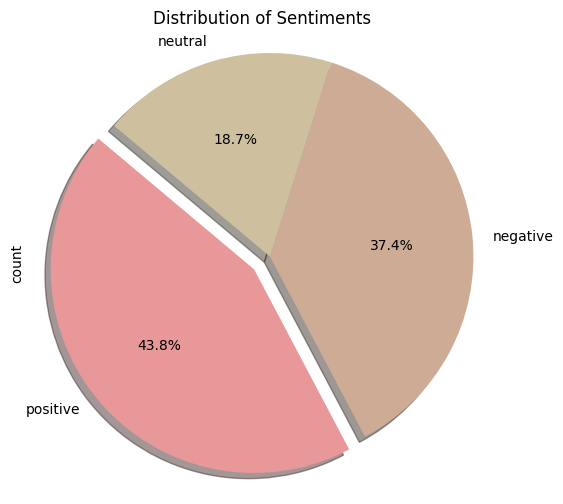

In [271]:
explode = (0.1, 0, 0)  # Explode first slice

# Set the color
color = ['#E89898','#CDAB94','#CEC09E']

# Assuming new_df['Sentiment'] contains categorical data with sentiment labels
new_df['Sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=explode, startangle=140, figsize=(6, 6), shadow=True, colors=color)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Title of the chart
plt.title("Distribution of Sentiments")

# Show the chart
plt.show()


1. **Why did you pick the specific chart?**

* I chose a Pie chart because it is one of the most effective ways to visualize percentage of the data, particularly when comparing the frequency or percentage of distinct categories.

2. **What is/are the insight(s) found from the chart?**
* Positive sentiment of the dataset around 44% is the highest tweets
* negative sentiment of the dataset around 38% is the second highest tweets
* Neutral sentiment of the dataset around 18% is the Lowest tweets



### Chart-2

1. **Why did you pick the specific chart?**
*  I chose a Pie chart because it is one of the most effective ways to visualize percentage of the data, particularly when comparing the frequency or percentage of distinct categories.

2. **What is/are the insight(s) found from the chart?**
